# SVM Iris dataset example

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import project_path
from ciu import determine_ciu


In [15]:
iris = pd.read_csv(os.path.join('data','IRIS.csv'))

In [16]:
# Checking the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Creating a pairplot to visualize the similarities and especially difference between the species
#sns.pairplot(data=iris, hue='species', palette='Set2')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Separating the independent variables from dependent variables
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [20]:
from sklearn.svm import SVC
model=SVC(kernel='linear', probability=True)


In [21]:
model.fit(x_train, y_train)
model.coef_

array([[-0.08760742,  0.44817763, -0.85078981, -0.43994681],
       [-0.02034588,  0.18311289, -0.5289928 , -0.30518815],
       [ 0.80492505,  0.2733594 , -2.025808  , -1.99248921]])

In [22]:

pred=model.predict(x_test)


In [23]:
feature_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
]


case = x_test.values[0]
example_prediction = model.predict([x_test.values[0]])
example_prediction_prob = model.predict_proba([x_test.values[0]])
prediction_index = 0 if example_prediction_prob[0][0] > 0.5 else 1

print(feature_names)
print(f'Case: {case}; Prediction {example_prediction}; Probability: {example_prediction_prob}')

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Case: [5.1 3.8 1.6 0.2]; Prediction ['Iris-setosa']; Probability: [[0.95865297 0.02701465 0.01433237]]


In [24]:

ciu = determine_ciu(
    x_test.iloc[0, :].to_dict(),
    model.predict_proba,
    {
        'sepal_length': [1.2, 6.2, False],
        'sepal_width': [1.2, 1.3, False],
        'petal_length': [4.4, 6.5, False],
        'petal_width': [2.5, 3.5, False],
    },
    100000,
    prediction_index,
)


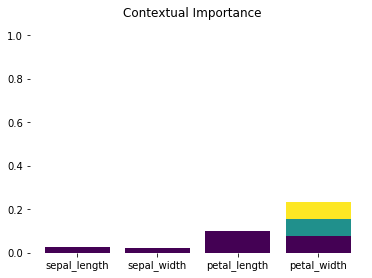

In [25]:
ciu.plot_ci()

In [27]:
ciu.plot_cu()

{'sepal_length': 0.2984606663347696,
 'sepal_width': 13.250705940750963,
 'petal_length': 9.943310281797878,
 'petal_width': 2.0122762459353583}

In [ ]:
print(ciu.text_explain())